# Standard Solow Model

Imports and set magics:

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description
*Standard Solow Model:*

$$
\begin{gathered}
Y_t=K_t^\alpha\left(A_t L_t\right)^{1-\alpha}, 0<\alpha<1 \\
K_{t+1}=S_t+(1-\delta) K_t \\
S_t=s Y_t, 0<s<1,0<\delta<1 \\
L_{t+1}=(1+n) L_t, n > -1 \\
A_{t+1}=(1+g) A_t, g \geq 0
\end{gathered}
$$
The production function is given by:
$$
Y_t = K_t^{\alpha}(A_tL_t)^{1-\alpha}
$$ 
It is a standard Cobb-Douglas production function which describes the total production as a function of capital stock $(K_t)$, workers $(L_t)$, and the level of technology $(A_t)$.

$Y_t$ is output in period $t$. <br>
$K_t$ is the capital stock in period $t$. <br>
$A_t$ is the level of technology in period $t$. <br>

The capital stock accumulates by
$$
K_{t+1} = sY_t + (1-\delta)K_t,
$$
where s is the exogenous savings rate  and $\delta$ is the rate at which capital depreciates. 


The labor force evolves as
$$
L_{t+1} = (1+n) L_t,
$$
where $n$ is the exogenous population growth rate. 

The level of technology evolves as
$$
A_{t+1} = (1+g) A_t,
$$
where $g$ is the exogenous technology growth rate. 

# Semi-endogenous Solow Model (Chp. 8)

$$Y_t = K_t^{\alpha} (A_t L_t)^{(1-\alpha)}, 1>\alpha>0$$
$$A_t=K_t^{\phi}, \phi<1$$
$$K_{t+1}=s Y_t +(1+\delta) K_t , 0<s<1,0<\delta<1 , K_t>0$$
$$L_{t+1}=(1+n)L_t, n\geq0$$


The standard solow model assumes exogen technology growth. Thus, we have chosen to also to at the enhance solow model which includes semi-endogenous growth in technology. This will require investments into the technology from GDP to gain further growth. 

## Analytical Solution

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

We know that in steady state the variables remain constant over time. 

$K_{t+1}=K_t=K$

We substitute into the investment equaiton

$K=S+(1-\delta)K$

We then use sympy to solve the equation. 

In [54]:
# Define the production function
def production(K, L, A, alpha):
    return K**alpha * (A*L)**(1-alpha)

# Define the technological progress function
def tech_progress(K, phi):
    return K**phi

# Define the system of equations to solve for the steady state
def steady_state_system(alpha, phi, s, delta, n):
    K, Y = sm.symbols('K Y')
    A = tech_progress(K, phi)
    dK_dt = s*production(K, 1, A, alpha) - (delta+n)*K
    dY_dt = n*Y + production(K, 1, A, alpha) - Y
    equations = [dK_dt, dY_dt]
    steady_state = sm.solve(equations, (K, Y))
    return steady_state



## Numerical solution

We find the numerical steady state solution for $K_t$ and $Y_t$ for the semi-endegenous model

In [55]:
# Define the model parameters
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02

# Find the steady state
steady_state = steady_state_system(alpha, phi, s, delta, n)

# Extract the steady state values
K_ss = steady_state[0][0]
Y_ss = steady_state[0][1]

# Print the results
print("Steady state capital stock: ", K_ss)
print("Steady state GDP: ", Y_ss)


Steady state capital stock:  2.48976571046725
Steady state GDP:  1.52434635334729


The above simulations solves the Solow model above using the initial values we have assigned to the parameter. It finds the steady state for GDP and Capital Stock. 


Now we add a share of labor income in GDP and find the new steady state and see how i affects the steady state values. 

In [56]:
# Define the production function
def production(K, L, A, alpha):
    return K**alpha * (A*L)**(1-alpha)

# Define the technological progress function
def tech_progress(K, phi):
    return K**phi

# Define the system of equations to solve for the steady state
def steady_state_system(alpha, phi, s, delta, n, w):
    K, Y = sm.symbols('K Y')
    A = tech_progress(K, phi)
    dK_dt = s*production(K, 1, A, alpha) - (delta+n)*K
    dY_dt = n*Y + w*production(K, 1, A, alpha) - Y
    equations = [dK_dt, dY_dt]
    steady_state = sm.solve(equations, (K, Y))
    return steady_state

# Define the model parameters
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02
w = 0.2

# Find the new steady state
steady_state = steady_state_system(alpha, phi, s, delta, n, w)

# Extract the new steady state values
K_ss = steady_state[0][0]
Y_ss = steady_state[0][1]

# Print the results
print("Steady state capital stock: ", K_ss)
print("Steady state GDP: ", Y_ss)


Steady state capital stock:  2.48976571046725
Steady state GDP:  0.304869270669459


The addition of the labor income share (w) in the GDP equation results in a lower steady state GDP. This is because when a portion of the output is allocated to labor income, the remaining portion available for investment and capital accumulation decreases. As a result, the steady state level of GDP, which represents the equilibrium level of output, is reduced compared to the case where labor income share is not considered. This demonstrates the impact of income distribution on the overall level of economic output in the model.

Now we simulate the Solow model using the Euler method, with the initial capital stock set to 1 and the initial GDP per worker calculated using the production function and technological progress function. 

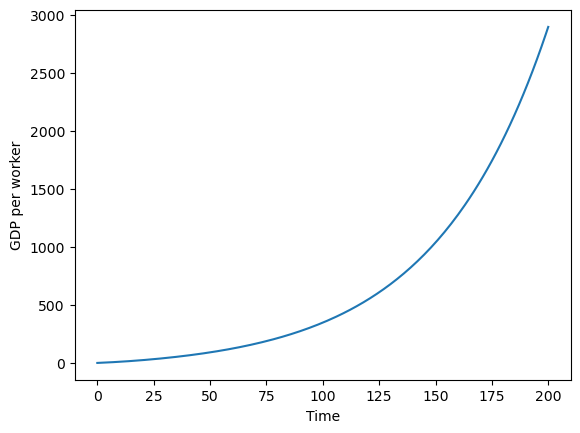

In [57]:
# Define the production function and technological progress function
def production(K, L, A):
    return K**alpha * (A*L)**(1-alpha)

def tech_progress(K, phi):
    return K**phi

# Define the system of equations for the Solow model
def solow_model(K, Y, A):
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + (1-w)*production(K, 1, A)
    return dK_dt, dY_dt

# Define the initial conditions
K0 = 1
Y0 = production(K0, 1, tech_progress(K0, phi))

# Define the simulation parameters
T = 200
dt = 1.0

# Define the arrays to store the simulation results
K_path = np.zeros(T+1)
Y_path = np.zeros(T+1)
A_path = np.zeros(T+1)

# Set the initial values
K_path[0] = K0
Y_path[0] = Y0
A_path[0] = tech_progress(K0, phi)

# Simulate the Solow model using the Euler method
for t in range(T):
    K, Y, A = K_path[t], Y_path[t], A_path[t]
    dK_dt, dY_dt = solow_model(K, Y, A)
    K_path[t+1] = K + dK_dt*dt
    Y_path[t+1] = Y + dY_dt*dt
    A_path[t+1] = tech_progress(K_path[t+1], phi)

# Plot the results
t_values = np.arange(T+1)
y_values = Y_path  # GDP per worker
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('GDP per worker')
plt.show()

## Simulation of the Solow Model

We now run the simulations but as a function

In [58]:
# Define the Solow model simulation function
def sim_solow(alpha):
    # Set the model parameters
    phi = 0.2
    s = 0.2
    delta = 0.1
    n = 0.02

    # Define the initial conditions
    K0 = 1
    Y0 = production(K0, 1, tech_progress(K0, phi))

    # Define the simulation parameters
    T = 200
    dt = 1.0

    # Define the arrays to store the simulation results
    K_path = np.zeros(T+1)
    Y_path = np.zeros(T+1)
    A_path = np.zeros(T+1)

    # Set the initial values
    K_path[0] = K0
    Y_path[0] = Y0
    A_path[0] = tech_progress(K0, phi)

    # Simulate the Solow model using the Euler method
    for t in range(T):
        K, Y, A = K_path[t], Y_path[t], A_path[t]
        dK_dt, dY_dt = solow_model(K, Y, A)
        K_path[t+1] = K + dK_dt*dt
        Y_path[t+1] = Y + dY_dt*dt
        A_path[t+1] = tech_progress(K_path[t+1], phi)

    return K_path, Y_path, A_path

We look at how the model will be affected if we change the value for alpha

We now add the values for alpha = 0.3 & 0.4

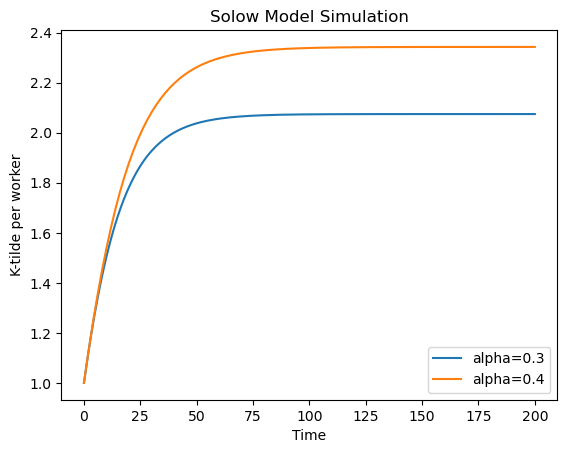

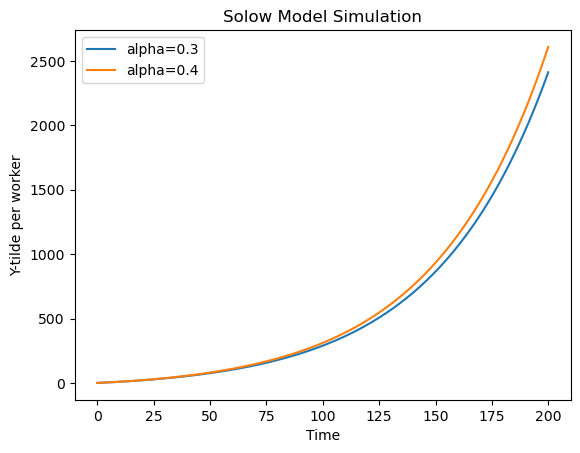

In [59]:
# Set the model parameters
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02

# Simulate the Solow model for alpha = 0.3
K_path, Y_path, A_path = sim_solow(alpha)

# Set the model parameter to alpha = 0.4
alpha = 0.4

# Simulate the Solow model for alpha = 0.4
K_path2, Y_path2, A_path2 = sim_solow(alpha)

# Plot the capital per worker (K-tilde) paths
time = np.arange(len(K_path))
plt.plot(time, K_path / A_path, label="alpha=0.3")
plt.plot(time, K_path2 / A_path2, label="alpha=0.4")
plt.xlabel('Time')
plt.ylabel('K-tilde per worker')
plt.title('Solow Model Simulation')
plt.legend()
plt.show()

# Plot the output per worker (Y-tilde) paths
plt.plot(time, Y_path / A_path, label="alpha=0.3")
plt.plot(time, Y_path2 / A_path2, label="alpha=0.4")
plt.xlabel('Time')
plt.ylabel('Y-tilde per worker')
plt.title('Solow Model Simulation')
plt.legend()
plt.show()


The plot above shows that a higher alpha results in a higher K-tilde and y-tilde per worker. This follows the expected development of the model. 

## Further Analysis

We extend our model by adding technological growth. We then plot capital per worker against gdp per worker:

Steady state value of capital per worker:  0.48508155097021366
Steady state value of gdp per worker:  0.33805994591060196


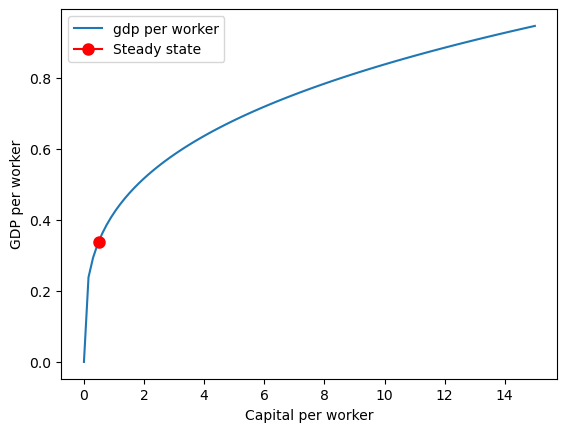

In [60]:
# Function to calculate the steady state value of capital per worker
def k_star(s, alpha, delta, n, g):
    return ((s/(n+g+delta))**(1/(1-alpha))) * ((n+g+delta)/alpha)

# Function to calculate the steady state value of output per worker
def y_star(s, alpha, delta, n, g):
    return k_star(s, alpha, delta, n, g)**alpha * (n+g+delta)

# Parameter values
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02
g = 0.3

# Calculate steady state values
k_star_val = k_star(s, alpha, delta, n, g)
y_star_val = y_star(s, alpha, delta, n, g)

# Print steady state values
print("Steady state value of capital per worker: ", k_star_val)
print("Steady state value of gdp per worker: ", y_star_val)

# Plot the Solow diagram
k_vals = np.linspace(0, 15, 100)
y_vals = k_vals**alpha * (n+g+delta)
plt.plot(k_vals, y_vals, label="gdp per worker")
plt.plot([k_star_val], [y_star_val], marker='o', markersize=8, color="red", label="Steady state")
plt.xlabel("Capital per worker")
plt.ylabel("GDP per worker")
plt.legend()
plt.show()

# Conclusion

The assignment highlights the relationship between capital per worker and gdp per worker. From this we see that as capital per worker increases gdp per worker also increases. However, it does noes increase 1:1 following diminishing returns. 